<a href="https://colab.research.google.com/github/vibhorrawal/code-backup/blob/master/ml/handson-ml/handson_ml_ch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import tarfile
import urllib

In [0]:
from six.moves import urllib


In [0]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [0]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [5]:
!ls

sample_data


In [0]:
fetch_housing_data()

In [0]:
import pandas as pd

In [0]:
def load_housing_data(housing_path = HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [0]:
housing = load_housing_data()

In [10]:
housing.head()

longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY

[5 rows x 10 columns]

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
housing.describe()

longitude      latitude  ...  median_income  median_house_value
count  20640.000000  20640.000000  ...   20640.000000        20640.000000
mean    -119.569704     35.631861  ...       3.870671       206855.816909
std        2.003532      2.135952  ...       1.899822       115395.615874
min     -124.350000     32.540000  ...       0.499900        14999.000000
25%     -121.800000     33.930000  ...       2.563400       119600.000000
50%     -118.490000     34.260000  ...       3.534800       179700.000000
75%     -118.010000     37.710000  ...       4.743250       264725.000000
max     -114.310000     41.950000  ...      15.000100       500001.000000

[8 rows x 9 columns]

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt

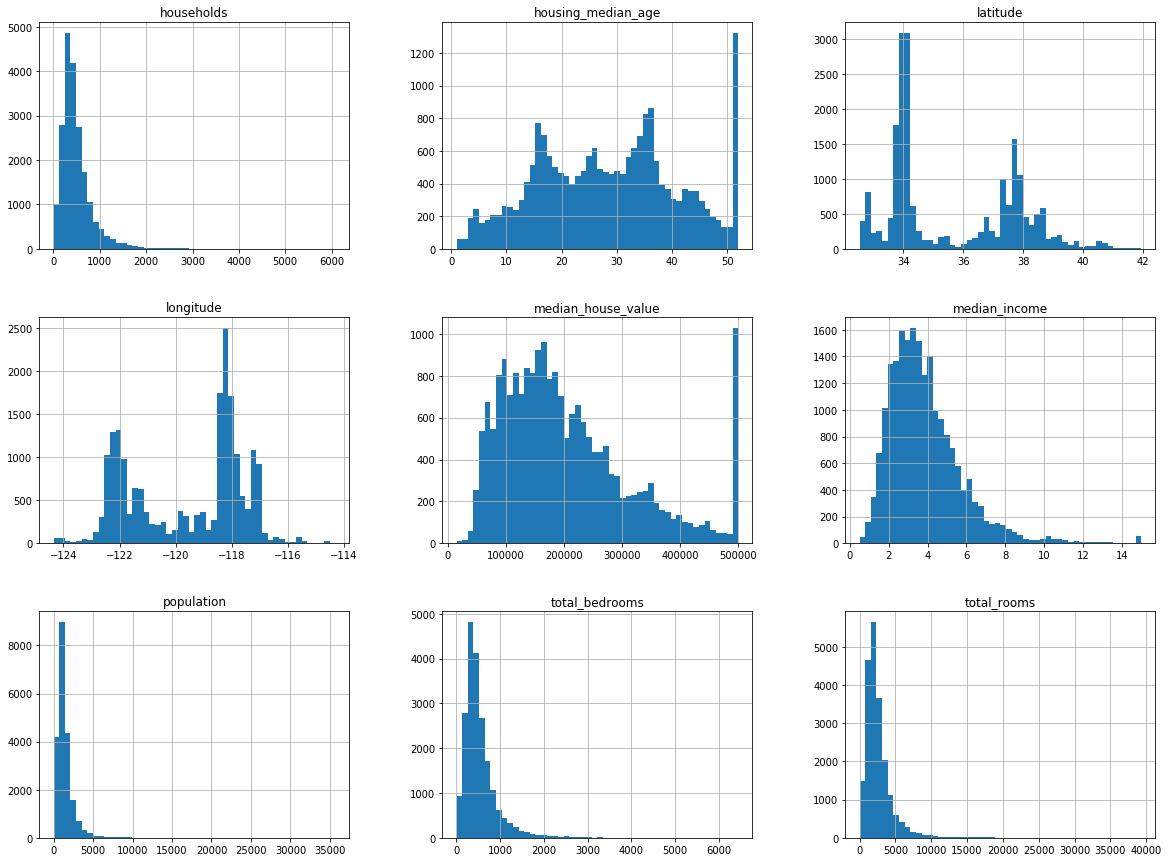

In [16]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [0]:
import numpy as np

In [0]:
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [19]:
housing.iloc[1]

longitude              -122.22
latitude                 37.86
housing_median_age          21
total_rooms               7099
total_bedrooms            1106
population                2401
households                1138
median_income           8.3014
median_house_value      358500
ocean_proximity       NEAR BAY
Name: 1, dtype: object

In [20]:
housing.loc[1]

longitude              -122.22
latitude                 37.86
housing_median_age          21
total_rooms               7099
total_bedrooms            1106
population                2401
households                1138
median_income           8.3014
median_house_value      358500
ocean_proximity       NEAR BAY
Name: 1, dtype: object

In [21]:
train_set, test_set = split_train_test(housing,0.2)
print(len(train_set), "train + ", len(test_set), "test")

16512 train +  4128 test


In [22]:
np.random.permutation(5)

array([1, 0, 3, 2, 4])

In [0]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
  return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_test_train_by_id(data, test_ratio, id_column, hash=hashlib.md5):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
#   print(in_test_set)
  return data.loc[~in_test_set], data.loc[in_test_set]

In [0]:
housing_with_id = housing.reset_index()
train_set, test_set = split_test_train_by_id(housing_with_id, 0.2, "index")

In [25]:
a = np.random.permutation(6)
a

array([1, 2, 5, 4, 0, 3])

In [26]:
~a

array([-2, -3, -6, -5, -1, -4])

In [27]:
a

array([1, 2, 5, 4, 0, 3])

In [28]:
a + ~a

array([-1, -1, -1, -1, -1, -1])

In [0]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_test_train_by_id(housing_with_id, 0.2, 'id')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

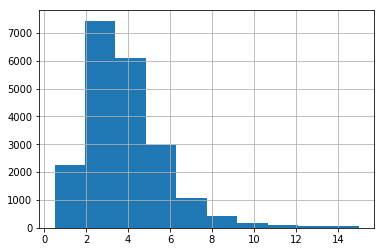

In [32]:
housing["median_income"].hist()

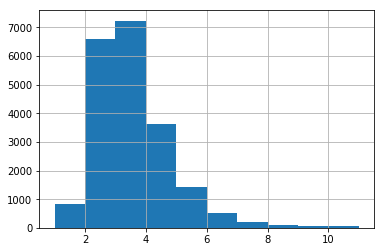

In [33]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].hist()


In [34]:
housing["income_cat"].where(housing["income_cat"] < 5, other = 5.0, inplace = True)
housing["income_cat"].value_counts()


3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

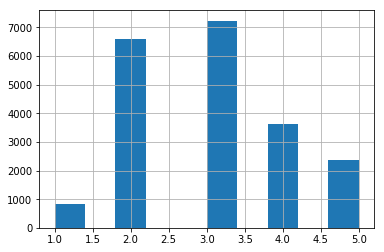

In [35]:
housing["income_cat"].hist()

In [36]:
housing["income_cat"].value_counts()/ len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

In [38]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]
  print('hello')
  print("train: ", train_index, ' test: ', test_index)

hello
train:  [17606 18632 14650 ... 13908 11159 15775]  test:  [ 5241 10970 20351 ...  4019 12107  2398]


In [39]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

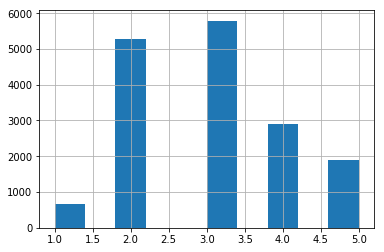

In [40]:
strat_train_set["income_cat"].hist()

In [0]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)


In [0]:
housing = strat_train_set.copy()

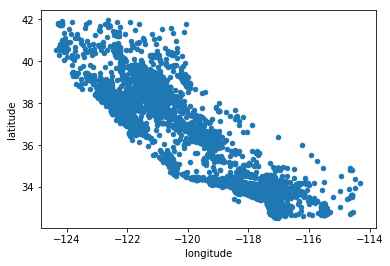

In [43]:
housing.plot(kind='scatter', x='longitude', y='latitude')

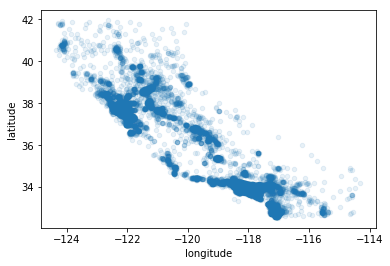

In [44]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

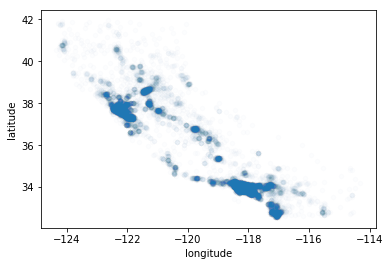

In [45]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha = 0.01)

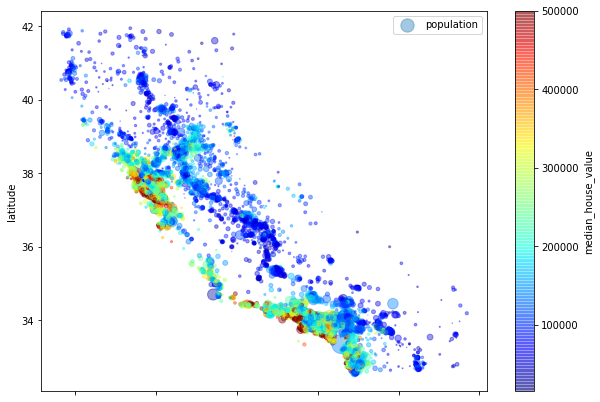

In [46]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()


In [47]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cee4234e0>,
      dtype=object)

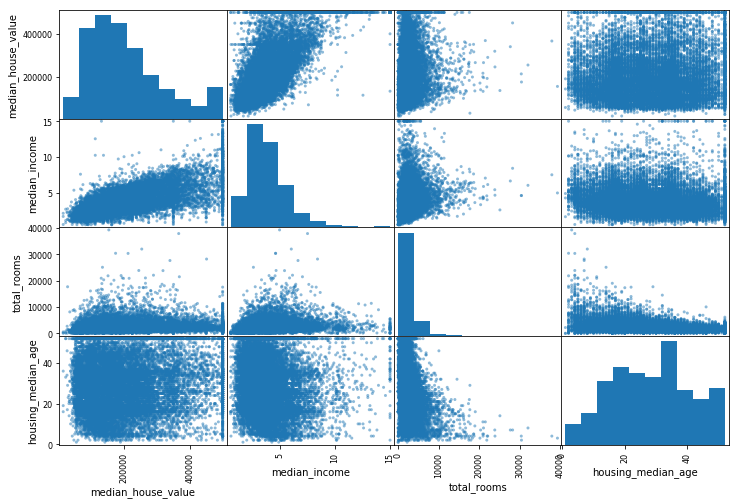

In [48]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
pd.plotting.scatter_matrix(housing[attributes], figsize=(12,8))

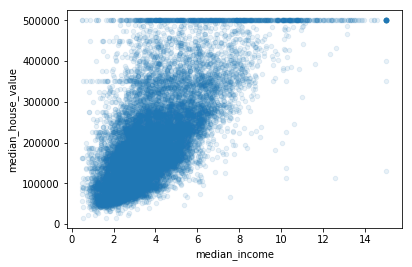

In [49]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [0]:
housing["rooms_per_housedold"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [51]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_housedold         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [0]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [53]:
housing['total_bedrooms']

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
19234     501.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18086     538.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
18067     438.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
11016     428.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
11703     300.0
10356     449.0
15270     515.0
3754      373.0
12166     756.0
6003      932.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Le

In [54]:
housing.dropna(subset=['total_bedrooms'])

longitude  latitude  ...  median_income  ocean_proximity
17606    -121.89     37.29  ...         2.7042        <1H OCEAN
18632    -121.93     37.05  ...         6.4214        <1H OCEAN
14650    -117.20     32.77  ...         2.8621       NEAR OCEAN
3230     -119.61     36.31  ...         1.8839           INLAND
3555     -118.59     34.23  ...         3.0347        <1H OCEAN
19480    -120.97     37.66  ...         3.5395           INLAND
8879     -118.50     34.04  ...         8.3839        <1H OCEAN
13685    -117.24     34.15  ...         6.0000           INLAND
4937     -118.26     33.99  ...         1.8242        <1H OCEAN
4861     -118.28     34.02  ...         0.4999        <1H OCEAN
16365    -121.31     38.02  ...         2.7981           INLAND
19684    -121.62     39.14  ...         1.6902           INLAND
19234    -122.69     38.51  ...         6.6854        <1H OCEAN
13956    -117.06     34.17  ...         2.7120           INLAND
2390     -119.46     36.91  ...         3.9141           INLAND
11176    -117.96     33.83  ...         3.3831        <1H OCEAN
15614    -122.41     37.81  ...         3.6728         NEAR BAY
2953     -119.02     35.35  ...         1.9830           INLAND
13209    -117.72     34.05  ...         4.0614           INLAND
6569     -118.15     34.20  ...         4.5000           INLAND
5825     -118.30     34.19  ...         3.5083        <1H OCEAN
18086    -122.05     37.31  ...         9.2298        <1H OCEAN
16718    -120.66     35.49  ...         2.8285        <1H OCEAN
13600    -117.25     34.16  ...         3.7188           INLAND
13989    -117.19     34.94  ...         2.1522           INLAND
15168    -117.06     33.02  ...         1.9176        <1H OCEAN
6747     -118.07     34.11  ...         5.0736        <1H OCEAN
7398     -118.24     33.96  ...         1.7778        <1H OCEAN
5562     -118.28     33.91  ...         2.6546        <1H OCEAN
16121    -122.46     37.79  ...         3.7419         NEAR BAY
...          ...       ...  ...            ...              ...
12380    -116.47     33.77  ...         4.4107           INLAND
5618     -118.23     33.78  ...         2.5588       NEAR OCEAN
10060    -121.06     39.25  ...         3.9537           INLAND
18067    -122.03     37.29  ...        10.3653        <1H OCEAN
4471     -118.17     34.09  ...         2.2348        <1H OCEAN
19786    -122.86     40.56  ...         1.7393           INLAND
9969     -122.48     38.51  ...         3.1312           INLAND
14621    -117.17     32.78  ...         2.3658       NEAR OCEAN
579      -122.07     37.71  ...         5.3015         NEAR BAY
11682    -118.01     33.87  ...         3.1390        <1H OCEAN
245      -122.21     37.78  ...         1.7188         NEAR BAY
12130    -117.23     33.94  ...         3.0789           INLAND
16441    -121.29     38.14  ...         3.2338           INLAND
11016    -117.82     33.76  ...         6.2944        <1H OCEAN
19934    -119.34     36.31  ...         2.7000           INLAND
1364     -122.14     38.03  ...         2.5795         NEAR BAY
1236     -120.37     38.23  ...         2.6942           INLAND
5364     -118.42     34.04  ...         5.6454        <1H OCEAN
11703    -117.97     33.88  ...         6.0394        <1H OCEAN
10356    -117.67     33.60  ...         6.7921        <1H OCEAN
15270    -117.29     33.08  ...         5.7787       NEAR OCEAN
3754     -118.37     34.18  ...         2.9728        <1H OCEAN
12166    -117.14     33.81  ...         3.2778           INLAND
6003     -117.77     34.08  ...         6.0434           INLAND
7364     -118.20     33.97  ...         1.8897        <1H OCEAN
6563     -118.13     34.20  ...         4.9312           INLAND
12053    -117.56     33.88  ...         2.0682           INLAND
13908    -116.40     34.09  ...         3.2723           INLAND
11159    -118.01     33.82  ...         4.0625        <1H OCEAN
15775    -122.45     37.77  ...         3.5750         NEAR BAY

[16354 rows x 9 columns]

In [55]:
housing.drop('total_bedrooms',axis=1)

longitude  latitude  ...  median_income  ocean_proximity
17606    -121.89     37.29  ...         2.7042        <1H OCEAN
18632    -121.93     37.05  ...         6.4214        <1H OCEAN
14650    -117.20     32.77  ...         2.8621       NEAR OCEAN
3230     -119.61     36.31  ...         1.8839           INLAND
3555     -118.59     34.23  ...         3.0347        <1H OCEAN
19480    -120.97     37.66  ...         3.5395           INLAND
8879     -118.50     34.04  ...         8.3839        <1H OCEAN
13685    -117.24     34.15  ...         6.0000           INLAND
4937     -118.26     33.99  ...         1.8242        <1H OCEAN
4861     -118.28     34.02  ...         0.4999        <1H OCEAN
16365    -121.31     38.02  ...         2.7981           INLAND
19684    -121.62     39.14  ...         1.6902           INLAND
19234    -122.69     38.51  ...         6.6854        <1H OCEAN
13956    -117.06     34.17  ...         2.7120           INLAND
2390     -119.46     36.91  ...         3.9141           INLAND
11176    -117.96     33.83  ...         3.3831        <1H OCEAN
15614    -122.41     37.81  ...         3.6728         NEAR BAY
2953     -119.02     35.35  ...         1.9830           INLAND
13209    -117.72     34.05  ...         4.0614           INLAND
6569     -118.15     34.20  ...         4.5000           INLAND
5825     -118.30     34.19  ...         3.5083        <1H OCEAN
18086    -122.05     37.31  ...         9.2298        <1H OCEAN
16718    -120.66     35.49  ...         2.8285        <1H OCEAN
13600    -117.25     34.16  ...         3.7188           INLAND
13989    -117.19     34.94  ...         2.1522           INLAND
15168    -117.06     33.02  ...         1.9176        <1H OCEAN
6747     -118.07     34.11  ...         5.0736        <1H OCEAN
7398     -118.24     33.96  ...         1.7778        <1H OCEAN
5562     -118.28     33.91  ...         2.6546        <1H OCEAN
16121    -122.46     37.79  ...         3.7419         NEAR BAY
...          ...       ...  ...            ...              ...
12380    -116.47     33.77  ...         4.4107           INLAND
5618     -118.23     33.78  ...         2.5588       NEAR OCEAN
10060    -121.06     39.25  ...         3.9537           INLAND
18067    -122.03     37.29  ...        10.3653        <1H OCEAN
4471     -118.17     34.09  ...         2.2348        <1H OCEAN
19786    -122.86     40.56  ...         1.7393           INLAND
9969     -122.48     38.51  ...         3.1312           INLAND
14621    -117.17     32.78  ...         2.3658       NEAR OCEAN
579      -122.07     37.71  ...         5.3015         NEAR BAY
11682    -118.01     33.87  ...         3.1390        <1H OCEAN
245      -122.21     37.78  ...         1.7188         NEAR BAY
12130    -117.23     33.94  ...         3.0789           INLAND
16441    -121.29     38.14  ...         3.2338           INLAND
11016    -117.82     33.76  ...         6.2944        <1H OCEAN
19934    -119.34     36.31  ...         2.7000           INLAND
1364     -122.14     38.03  ...         2.5795         NEAR BAY
1236     -120.37     38.23  ...         2.6942           INLAND
5364     -118.42     34.04  ...         5.6454        <1H OCEAN
11703    -117.97     33.88  ...         6.0394        <1H OCEAN
10356    -117.67     33.60  ...         6.7921        <1H OCEAN
15270    -117.29     33.08  ...         5.7787       NEAR OCEAN
3754     -118.37     34.18  ...         2.9728        <1H OCEAN
12166    -117.14     33.81  ...         3.2778           INLAND
6003     -117.77     34.08  ...         6.0434           INLAND
7364     -118.20     33.97  ...         1.8897        <1H OCEAN
6563     -118.13     34.20  ...         4.9312           INLAND
12053    -117.56     33.88  ...         2.0682           INLAND
13908    -116.40     34.09  ...         3.2723           INLAND
11159    -118.01     33.82  ...         4.0625        <1H OCEAN
15775    -122.45     37.77  ...         3.5750         NEAR BAY

[16512 rows x 8 columns]

In [0]:
median = housing["total_bedrooms"].median()
housing['total_bedrooms'].fillna(median, inplace=True)

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [58]:
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [59]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [60]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [0]:
X = imputer.transform(housing_num)

In [0]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [63]:
imputer.strategy, imputer.statistics_


('median',
 array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
         408.    ,    3.5409]))

In [64]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [65]:
encoder.classes_


array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [66]:
housing_cat_encoded.reshape(-1,1)

array([[0],
       [0],
       [4],
       ...,
       [1],
       [0],
       [3]])

In [67]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [68]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [69]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN

In [70]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [71]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [72]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = [ list(housing.columns).index(col) for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scalar', StandardScaler()),
])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [75]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values

In [0]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [78]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scalar', StandardScaler()),
])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer()),
])

In [0]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])

In [81]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

TypeError: ignored

In [82]:
from sklearn.compose import ColumnTransformer
# full_pipeline = 

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [85]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
      
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])


from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared
np.allclose(housing_prepared, old_housing_prepared)


True

In [86]:
from sklearn.linear_model import LinearRegression  

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [88]:
list(some_labels)

[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]

In [90]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [91]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [92]:

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [0]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [94]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


In [95]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798344


In [96]:

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [97]:

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21933.31414779769

In [98]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
Mean: 52583.72407377466
Standard deviation: 2298.353351147122


In [99]:
from sklearn.externals import joblib
joblib.dump(forest_reg, 'my_model.pkl')
# and later
my_model_loaded = joblib.load('my_model.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [102]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [103]:
grid_search.best_params_


{'max_features': 8, 'n_estimators': 30}

In [104]:
grid_search.best_estimator_


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [105]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.05791727153 {'max_features': 2, 'n_estimators': 3}
55627.16171305252 {'max_features': 2, 'n_estimators': 10}
53384.57867637289 {'max_features': 2, 'n_estimators': 30}
60965.99185930139 {'max_features': 4, 'n_estimators': 3}
52740.98248528835 {'max_features': 4, 'n_estimators': 10}
50377.344409590376 {'max_features': 4, 'n_estimators': 30}
58663.84733372485 {'max_features': 6, 'n_estimators': 3}
52006.15355973719 {'max_features': 6, 'n_estimators': 10}
50146.465964159885 {'max_features': 6, 'n_estimators': 30}
57869.25504027614 {'max_features': 8, 'n_estimators': 3}
51711.09443660957 {'max_features': 8, 'n_estimators': 10}
49682.25345942335 {'max_features': 8, 'n_estimators': 30}
62895.088889905004 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.14484390074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.399594730654 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52725.01091081235 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [107]:
help (zip)

Help on class zip in module builtins:

class zip(object)
 |  zip(iter1 [,iter2 [...]]) --> zip object
 |  
 |  Return a zip object whose .__next__() method returns a tuple where
 |  the i-th element comes from the i-th iterable argument.  The .__next__()
 |  method continues until the shortest iterable in the argument sequence
 |  is exhausted and then it raises StopIteration.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.



In [108]:
pd.DataFrame(grid_search.cv_results_)


mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0        0.064511      0.002371  ...     -1.105559e+09     2.220402e+07
1        0.209503      0.005024  ...     -5.818785e+08     7.345821e+06
2        0.590590      0.032487  ...     -4.394734e+08     2.966320e+06
3        0.096866      0.001953  ...     -9.848396e+08     4.084607e+07
4        0.315126      0.005980  ...     -5.163863e+08     1.542862e+07
5        0.933823      0.005742  ...     -3.879289e+08     8.571233e+06
6        0.129307      0.003698  ...     -9.023976e+08     2.591445e+07
7        0.429286      0.003517  ...     -5.013349e+08     3.100456e+06
8        1.311615      0.009011  ...     -3.841296e+08     3.617057e+06
9        0.165395      0.001386  ...     -8.883545e+08     2.750227e+07
10       0.557090      0.004720  ...     -4.923911e+08     1.459294e+07
11       1.699669      0.017924  ...     -3.810330e+08     4.871017e+06
12       0.092594      0.001867  ...      0.000000e+00     0.000000e+00
13       0.306174      0.003131  ...     -6.056027e-01     1.181156e+00
14       0.126604      0.006865  ...     -1.214568e+01     2.429136e+01
15       0.402362      0.002254  ...     -5.272080e+00     8.093117e+00
16       0.154370      0.002324  ...      0.000000e+00     0.000000e+00
17       0.505832      0.003695  ...     -3.028238e-03     6.056477e-03

[18 rows x 23 columns]

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [110]:

cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.657232934034 {'max_features': 7, 'n_estimators': 180}
51389.85295710133 {'max_features': 5, 'n_estimators': 15}
50796.12045980556 {'max_features': 3, 'n_estimators': 72}
50835.09932039744 {'max_features': 5, 'n_estimators': 21}
49280.90117886215 {'max_features': 7, 'n_estimators': 122}
50774.86679035961 {'max_features': 3, 'n_estimators': 75}
50682.75001237282 {'max_features': 3, 'n_estimators': 88}
49608.94061293652 {'max_features': 5, 'n_estimators': 100}
50473.57642831875 {'max_features': 3, 'n_estimators': 150}
64429.763804893395 {'max_features': 5, 'n_estimators': 2}


In [111]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [112]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

In [0]:

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)


In [114]:
final_rmse


47730.22690385927